# Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import persons R

## Data frames

In [75]:
df0 = pd.read_csv('Combined_Data_Frame.csv', index_col=0)
df1 = pd.read_csv('peak-national-gfs-precipitation-forecast-by-year-since-2015.csv', index_col=0)
df2 = pd.read_csv('average-national-gfs-frozen-precipitation-forecast-by-year-since-2015.csv', index_col=0)

In [93]:
df3 = pd.read_csv('radiation.csv', index_col=0)

In [56]:
df1 = df1.drop(['2015', '2016', '2017', '2022'], axis=1)
df2 = df2.drop(['2015', '2016', '2017', '2022'], axis=1)

In [81]:
    # df0.reset_index(inplace=True)
    # df0.drop('index', axis=1, inplace=True)
    df0['Record Date'] = pd.to_datetime(df0['Record Date'])
    # df0

### Selected years

In [62]:
years = ['2018', '2019', '2020', '2021']

### Function

In [117]:
def selector(year, df, name):

    dc = df[[year]].copy()
    dc.reset_index(inplace=True)
    dc = dc.rename(columns = {'index':'Record Date'})

    dc['Record Date'] = pd.to_datetime(dc['Record Date'], format="[%d-%m]")
    dc.rename(columns = {year:name}, inplace = True)

    dc['Record Date'] = dc['Record Date'].astype('string')
    dc['Record Date'] = dc['Record Date'].str.replace('1900', year)
    dc['Record Date'] = pd.to_datetime(dc['Record Date'], format="%Y-%m-%d")

    return dc

def shuffleData(years, df, name):
    
    selectedList = [];

    for i in years:
        selected = selector(i, df, name)
        selectedList.append(selected)

    #Contact using Iteration
    ff = pd.concat([selectedList[3], selectedList[2],  selectedList[1],  selectedList[0]])

    ff.reset_index(inplace=True)
    ff.drop('index', axis=1, inplace=True)
    
    return ff

def mergeData(years, df, mf, name):
    
    sf = shuffleData(years, df, name)
    finalMerge = pd.merge(mf, sf, on='Record Date', how='right' )

    return finalMerge

### Run Code

In [118]:
df = mergeData(years, df3, df0, "Radiation")
df

,Record Date,Total Demand,Wind Speed,Air Temperature(Apparent),Air Temperature,Cloud Coverage,Radiation
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,63342.0,14.50,11.32,0.95,74.92,50.79
2,2021-01-02,67819.0,21.53,11.35,-0.01,68.10,44.90
3,2021-01-03,67018.0,20.20,10.32,0.07,85.41,42.45
4,2021-01-04,75574.0,13.58,10.49,0.10,87.49,37.06
...,...,...,...,...,...,...,...
1459,2018-12-27,68436.0,7.42,13.59,2.40,71.22,56.83
1460,2018-12-28,68179.0,14.38,14.28,2.36,53.98,55.43
1461,2018-12-29,64849.0,14.44,15.05,2.04,39.59,61.70
1462,2018-12-30,61282.0,17.58,16.38,3.42,50.86,55.69


In [119]:
df[360:370]

,Record Date,Total Demand,Wind Speed,Air Temperature(Apparent),Air Temperature,Cloud Coverage,Radiation
360,2021-12-26,53524.0,12.81,15.88,7.41,91.48,32.94
361,2021-12-27,57385.0,26.79,16.47,7.90,90.19,30.87
362,2021-12-28,56398.0,21.86,16.37,9.53,93.61,21.83
363,2021-12-29,54512.0,18.87,20.07,10.82,97.43,11.95
364,2021-12-30,52256.0,17.96,19.26,10.78,62.21,47.78
365,2021-12-31,52904.0,15.61,19.05,8.91,29.53,65.23
366,NaT,NaN,NaN,NaN,NaN,NaN,NaN
367,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
368,2020-01-02,64376.0,14.82,13.75,4.90,70.83,48.08
369,2020-01-03,62534.0,14.82,13.46,6.21,88.38,32.49


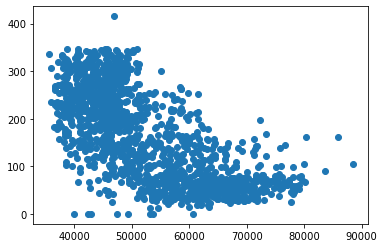

In [120]:
plt.scatter(df["Total Demand"], df["Radiation"])
plt.show()

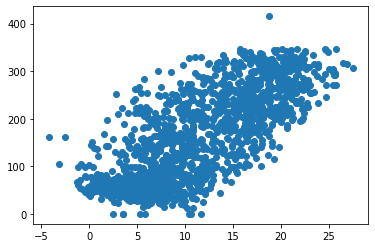

In [99]:
plt.scatter(df["Air Temperature"], df["Radiation"])
plt.show()

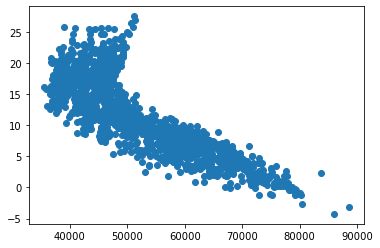

In [101]:
plt.scatter(df['Total Demand'],df["Air Temperature"])
plt.show()

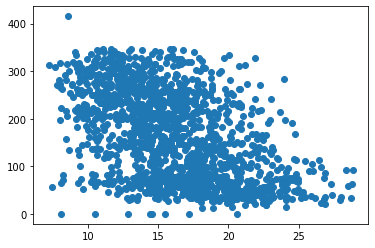

In [102]:
plt.scatter(df["Wind Speed"], df["Radiation"])
plt.show()

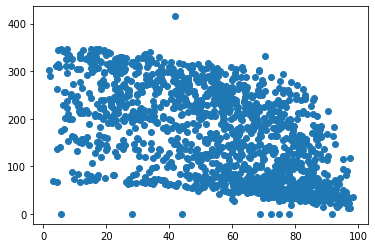

In [107]:
plt.scatter(df["Cloud Coverage"], df["Radiation"])
plt.show()